In [1]:
#Imports
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import warnings
import scipy.stats as scs
import statistics
import math
import seaborn as sns
%matplotlib inline
import random
from collections import Counter
import seaborn as sns

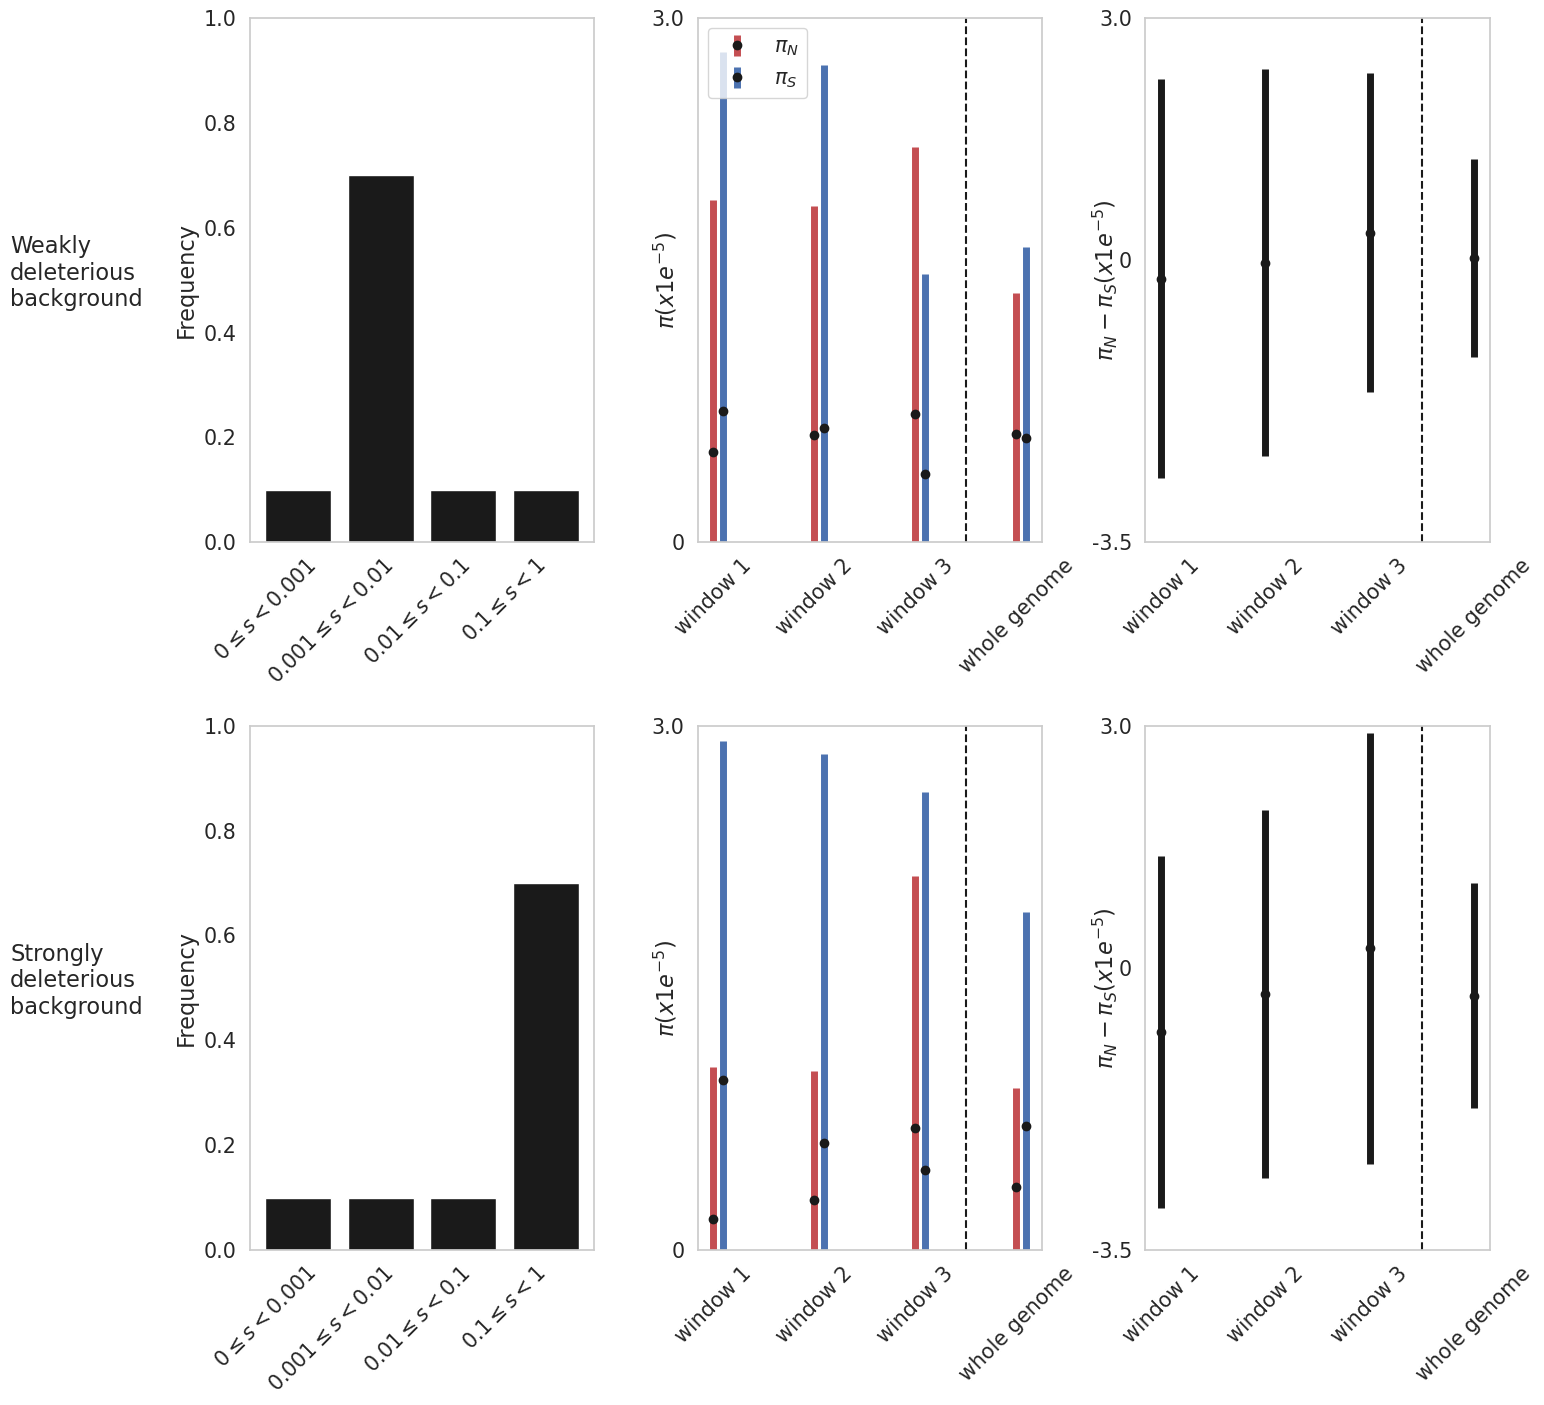

In [5]:
######FIGURE 1#####

lim1 = [0, 3e-5]
lim2 =  [-3.5e-5, 3e-5]

sns.set(rc={'figure.figsize':(16,16),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.35)

DFE = [0.1,0.7,0.1,0.1]
t = ['a)', 'b)', 'c)']
x = [a for a in range(0,4)]
plt.subplot(2,3,1)
plt.bar(x=x, height=DFE, color='k')
plt.ylim([0,1])
#plt.yticks([])
plt.ylabel('Frequency')
plt.xticks([-0.4,0.4,1.45,2.5], [r'$0 \leq s < 0.001$', r'$0.001 \leq s < 0.01$', r'$0.01 \leq s < 0.1$', r'$0.1 \leq s < 1$'], 
           rotation=45)
plt.text(s='Weakly\ndeleterious\nbackground', x=-3.5, y=0.45)


DFE1_NS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE/windows/DFE1_MAF_NS.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_NS[i] = DFE1_NS[i] / (6666-DFE1_NS[i+1])
DFE1_NS = DFE1_NS[[1,3,5]]
DFE1_NS.columns = [1,2,3]

DFE1_S = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE/windows/DFE1_MAF_S.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_S[i] = DFE1_S[i] / (3333-DFE1_S[i+1])
DFE1_S = DFE1_S[[1,3,5]]
DFE1_S.columns = [1,2,3]

dfN = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE/DFE1_MAF_NS.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfN['thetapi'] = dfN['thetapi'] / (20000 - dfN['masked_sites'])

dfS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE/DFE1_MAF_S.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfS['thetapi'] = dfS['thetapi'] / (10000 - dfS['masked_sites']) 

  
ax1 = plt.subplot(2,3,2)
for i in [1,2,3]:
    ax1.errorbar([(i-1)+0], DFE1_NS[i].mean(), DFE1_NS[i].std(), fmt='ok', lw=5, ecolor=['r'])
    ax1.errorbar([(i-1)+0.1], DFE1_S[i].mean(), DFE1_S[i].std(), fmt='ok', lw=5, ecolor=['b'])

ax1.errorbar([3], dfN['thetapi'].mean(), dfN['thetapi'].std(), fmt='ok', lw=5, ecolor=['r'], label=r'$\pi_N$')
ax1.errorbar([3.1], dfS['thetapi'].mean(), dfS['thetapi'].std(), fmt='ok', lw=5, ecolor=['b'], label=r'$\pi_S$')   

plt.axvline(x=2.5, color='k', linestyle='--')
ax1.set_ylim(lim1)
plt.yticks([lim1[0], lim1[1]], ['0', str(float(lim1[1]*1e+5))])
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi    (x    1e^{-5})$', labelpad=-20)
plt.legend()

ax1 = plt.subplot(2,3,3)
for i in [1,2,3]:
    ax1.errorbar([i-1], np.mean(DFE1_NS[i] - DFE1_S[i]), np.std(DFE1_NS[i] - DFE1_S[i]), 
             fmt='ok', lw=5, ecolor=['k'], label='DFE 1:  $\pi_N-\pi_S$') 
    
ax1.errorbar([3], np.mean(dfN.thetapi - dfS.thetapi), np.std(dfN.thetapi - dfS.thetapi), 
             fmt='ok', lw=5, ecolor=['k'], label=r'DFE 1: $\pi_N-\pi_S$') 

plt.axvline(x=2.5, color='k', linestyle='--')
ax1.set_ylim(lim2)
plt.yticks([lim2[0], 0, lim2[1]], [str(np.round(float(lim2[0]*1e+5),1)), '0', str(float(lim2[1]*1e+5))])
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi_N-\pi_S    (x    1e^{-5})$', labelpad=-20)


DFE = [0.1,0.1,0.1,0.7]
t = ['a)', 'b)', 'c)']
x = [a for a in range(0,4)]
plt.subplot(2,3,4)
plt.bar(x=x, height=DFE, color='k')
plt.ylim([0,1])
plt.ylabel('Frequency')
#plt.xticks([0,1,2,3], [r'$f_0$', r'$f_1$', r'$f_2$', r'$f_3$'])
plt.xticks([-0.4,0.4,1.45,2.5], [r'$0 \leq s < 0.001$', r'$0.001 \leq s < 0.01$', r'$0.01 \leq s < 0.1$', r'$0.1 \leq s < 1$'], 
           rotation=45)
plt.text(s='Strongly\ndeleterious\nbackground', x=-3.5, y=0.45)


DFE1_NS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE/windows/DFE3_MAF_NS.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_NS[i] = DFE1_NS[i] / (6666-DFE1_NS[i+1])
DFE1_NS = DFE1_NS[[1,3,5]]
DFE1_NS.columns = [1,2,3]

DFE1_S = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE/windows/DFE3_MAF_S.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_S[i] = DFE1_S[i] / (3333-DFE1_S[i+1])
DFE1_S = DFE1_S[[1,3,5]]
DFE1_S.columns = [1,2,3]

dfN = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE/DFE3_MAF_NS.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfN['thetapi'] = dfN['thetapi'] / (20000 - dfN['masked_sites'])

dfS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE/DFE3_MAF_S.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfS['thetapi'] = dfS['thetapi'] / (10000 - dfS['masked_sites']) 

  
ax1 = plt.subplot(2,3,5)
for i in [1,2,3]:
    ax1.errorbar([(i-1)+0], DFE1_NS[i].mean(), DFE1_NS[i].std(), fmt='ok', lw=5, ecolor=['r'])
    ax1.errorbar([(i-1)+0.1], DFE1_S[i].mean(), DFE1_S[i].std(), fmt='ok', lw=5, ecolor=['b'])

ax1.errorbar([3], dfN['thetapi'].mean(), dfN['thetapi'].std(), fmt='ok', lw=5, ecolor=['r'], label=r'$\pi_N$')
ax1.errorbar([3.1], dfS['thetapi'].mean(), dfS['thetapi'].std(), fmt='ok', lw=5, ecolor=['b'], label=r'$\pi_S$')   

plt.axvline(x=2.5, color='k', linestyle='--')
ax1.set_ylim(lim1)
plt.yticks([lim1[0], lim1[1]], ['0', str(float(lim1[1]*1e+5))])
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi(x    1e^{-5})$', labelpad=-20)

ax1 = plt.subplot(2,3,6)
for i in [1,2,3]:
    ax1.errorbar([i-1], np.mean(DFE1_NS[i] - DFE1_S[i]), np.std(DFE1_NS[i] - DFE1_S[i]), 
             fmt='ok', lw=5, ecolor=['k'], label='DFE 1:  $\pi_N-\pi_S$') 
    
ax1.errorbar([3], np.mean(dfN.thetapi - dfS.thetapi), np.std(dfN.thetapi - dfS.thetapi), 
             fmt='ok', lw=5, ecolor=['k'], label=r'DFE 1: $\pi_N-\pi_S$') 

plt.axvline(x=2.5, color='k', linestyle='--')

ax1.set_ylim(lim2)    
plt.yticks([lim2[0], 0, lim2[1]], [str(np.round(float(lim2[0]*1e+5),1)), '0', str(float(lim2[1]*1e+5))])
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi_N-\pi_S    (x    1e^{-5})$', labelpad=-20)

plt.subplots_adjust(wspace=0.3, hspace=0.35)
#plt.savefig('/home/vivak/gu_response/fig1.tiff', format='tiff', dpi=600, bbox_inches='tight')

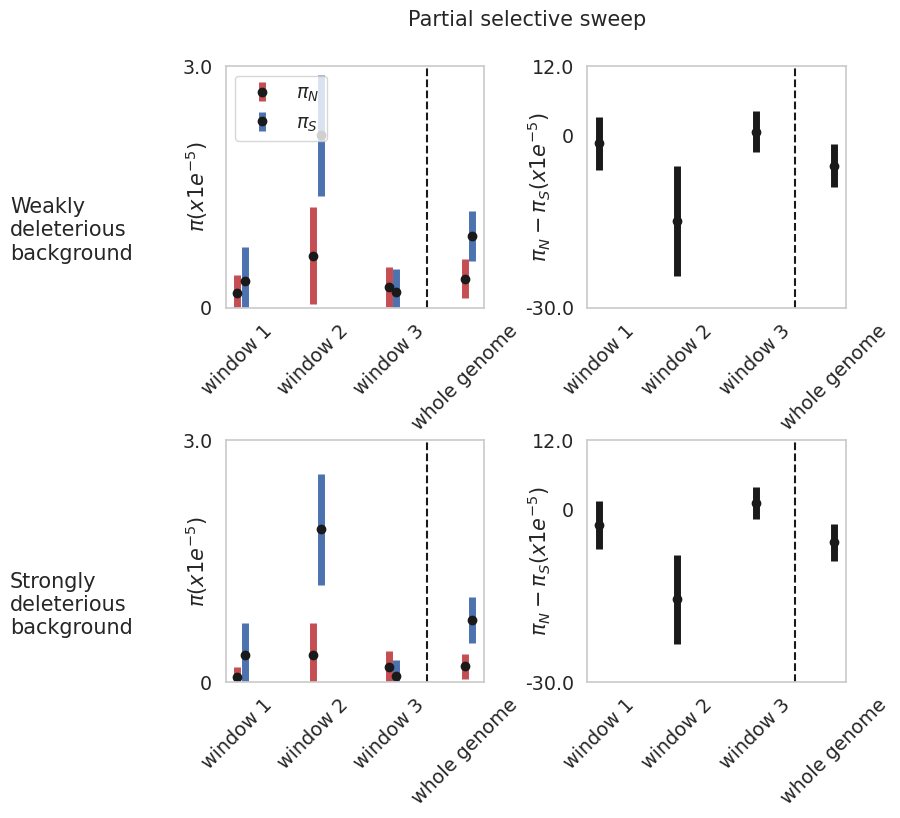

In [6]:
#####CODE FOR CREATING FIRST ROW OF FIGURE 2#####

lim1 = [0, 3e-4]
lim2 =  [-30e-5, 12e-5]

sns.set(rc={'figure.figsize':(8,8),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)


DFE1_NS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/windows/DFE1_0.5_MAF_NS.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_NS[i] = DFE1_NS[i] / (6666-DFE1_NS[i+1])
DFE1_NS = DFE1_NS[[1,3,5]]
DFE1_NS.columns = [1,2,3]

DFE1_S = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/windows/DFE1_0.5_MAF_S.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_S[i] = DFE1_S[i] / (3333-DFE1_S[i+1])
DFE1_S = DFE1_S[[1,3,5]]
DFE1_S.columns = [1,2,3]

dfN = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/DFE1_0.5_MAF_NS.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfN['thetapi'] = dfN['thetapi'] / (20000 - dfN['masked_sites'])

dfS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/DFE1_0.5_MAF_S.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfS['thetapi'] = dfS['thetapi'] / (10000 - dfS['masked_sites']) 

  
ax1 = plt.subplot(2,2,1)
for i in [1,2,3]:
    ax1.errorbar([(i-1)+0], DFE1_NS[i].mean(), DFE1_NS[i].std(), fmt='ok', lw=5, ecolor=['r'])
    ax1.errorbar([(i-1)+0.1], DFE1_S[i].mean(), DFE1_S[i].std(), fmt='ok', lw=5, ecolor=['b'])
    if(i==1):
        plt.text(s='Weakly\ndeleterious\nbackground', x=-3, y=6e-5)
        plt.text(s='Partial selective sweep', x=2.25, y=3.5e-4)
                
ax1.errorbar([3], dfN['thetapi'].mean(), dfN['thetapi'].std(), fmt='ok', lw=5, ecolor=['r'], label=r'$\pi_N$')
ax1.errorbar([3.1], dfS['thetapi'].mean(), dfS['thetapi'].std(), fmt='ok', lw=5, ecolor=['b'], label=r'$\pi_S$')   
plt.legend(loc='upper left')
ax1.set_ylim(lim1)
plt.yticks([lim1[0], lim1[1]], ['0', str(np.round(lim1[1]*1e+4, 1))])
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi    (x    1e^{-5})$', labelpad=-20)
plt.axvline(x=2.5, color='k', linestyle='--')

ax1 = plt.subplot(2,2,2)
for i in [1,2,3]:
    ax1.errorbar([i-1], np.mean(DFE1_NS[i] - DFE1_S[i]), np.std(DFE1_NS[i] - DFE1_S[i]), 
             fmt='ok', lw=5, ecolor=['k'], label='DFE 1:  $\pi_N-\pi_S$') 
    
ax1.errorbar([3], np.mean(dfN.thetapi - dfS.thetapi), np.std(dfN.thetapi - dfS.thetapi), 
             fmt='ok', lw=5, ecolor=['k'], label=r'DFE 1: $\pi_N-\pi_S$') 


ax1.set_ylim(lim2)
plt.yticks([lim2[0], 0, lim2[1]], [str(np.round(float(lim2[0]*1e+5),0)), 0, str(np.round(float(lim2[1]*1e+5),0))])
plt.axvline(x=2.5, color='k', linestyle='--')
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi_N-\pi_S    (x    1e^{-5})$', labelpad=-20)



DFE1_NS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/windows/DFE3_0.5_MAF_NS.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_NS[i] = DFE1_NS[i] / (6666-DFE1_NS[i+1])
DFE1_NS = DFE1_NS[[1,3,5]]
DFE1_NS.columns = [1,2,3]

DFE1_S = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/windows/DFE3_0.5_MAF_S.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_S[i] = DFE1_S[i] / (3333-DFE1_S[i+1])
DFE1_S = DFE1_S[[1,3,5]]
DFE1_S.columns = [1,2,3]

dfN = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/DFE3_0.5_MAF_NS.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfN['thetapi'] = dfN['thetapi'] / (20000 - dfN['masked_sites'])

dfS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/DFE3_0.5_MAF_S.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfS['thetapi'] = dfS['thetapi'] / (10000 - dfS['masked_sites']) 

  
ax1 = plt.subplot(2,2,3)
for i in [1,2,3]:
    ax1.errorbar([(i-1)+0], DFE1_NS[i].mean(), DFE1_NS[i].std(), fmt='ok', lw=5, ecolor=['r'], label=r'$\pi_N$')
    ax1.errorbar([(i-1)+0.1], DFE1_S[i].mean(), DFE1_S[i].std(), fmt='ok', lw=5, ecolor=['b'], label=r'$\pi_S$')
    if(i==1):
        plt.text(s='Strongly\ndeleterious\nbackground', x=-3, y=6e-5)

        
ax1.errorbar([3], dfN['thetapi'].mean(), dfN['thetapi'].std(), fmt='ok', lw=5, ecolor=['r'], label=r'$\pi_N$')
ax1.errorbar([3.1], dfS['thetapi'].mean(), dfS['thetapi'].std(), fmt='ok', lw=5, ecolor=['b'], label=r'$\pi_S$')   

ax1.set_ylim(lim1)
plt.yticks([lim1[0], lim1[1]], ['0', str(np.round(lim1[1]*1e+4, 1))])
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi    (x    1e^{-5})$', labelpad=-20)
plt.axvline(x=2.5, color='k', linestyle='--')

ax1 = plt.subplot(2,2,4)
for i in [1,2,3]:
    ax1.errorbar([i-1], np.mean(DFE1_NS[i] - DFE1_S[i]), np.std(DFE1_NS[i] - DFE1_S[i]), 
             fmt='ok', lw=5, ecolor=['k'], label='DFE 1:  $\pi_N-\pi_S$') 
    
ax1.errorbar([3], np.mean(dfN.thetapi - dfS.thetapi), np.std(dfN.thetapi - dfS.thetapi), 
             fmt='ok', lw=5, ecolor=['k'], label=r'DFE 1: $\pi_N-\pi_S$') 


ax1.set_ylim(lim2)
plt.yticks([lim2[0], 0, lim2[1]], [str(np.round(float(lim2[0]*1e+5),0)), 0, str(np.round(float(lim2[1]*1e+5),0))])
plt.axvline(x=2.5, color='k', linestyle='--')
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi_N-\pi_S    (x    1e^{-5})$', labelpad=-20)

plt.subplots_adjust(wspace=0.4, hspace=0.55)
#plt.savefig('/home/vivak/gu_response/fig2a.tiff', format='tiff', dpi=300, bbox_inches='tight')

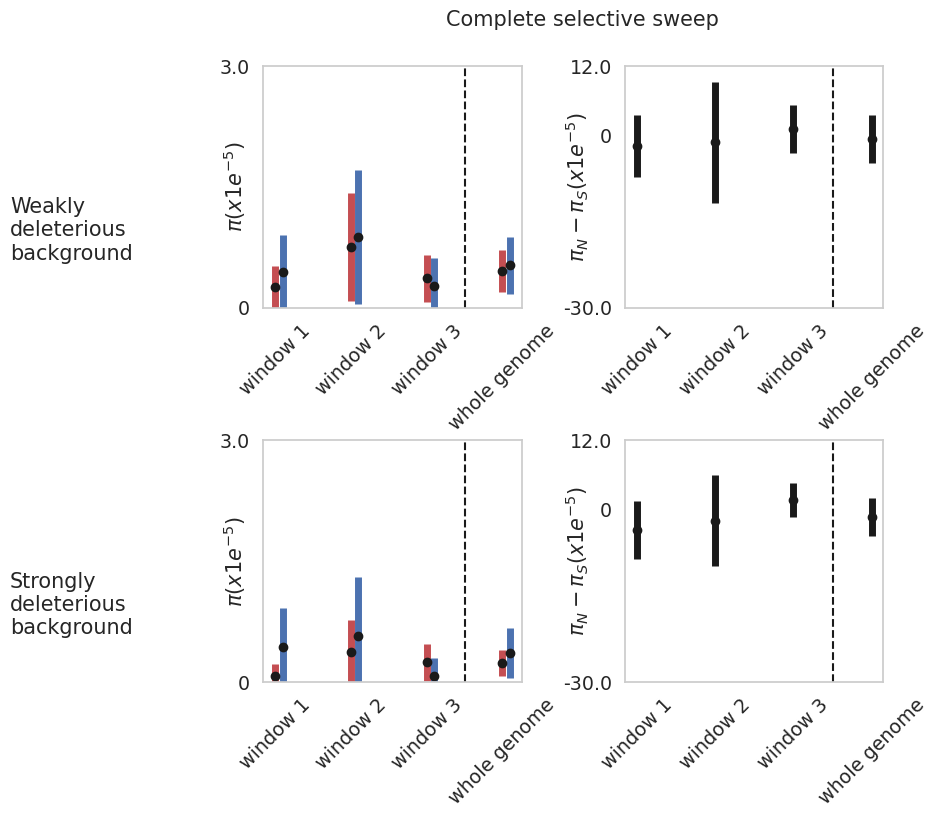

In [7]:
#####CODE FOR CREATING SECOND ROW OF FIGURE 2#####

lim1 = [0, 3e-4]
lim2 =  [-30e-5, 12e-5]

sns.set(rc={'figure.figsize':(8,8),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)


DFE1_NS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/windows/DFE1_1.0_MAF_NS.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_NS[i] = DFE1_NS[i] / (6666-DFE1_NS[i+1])
DFE1_NS = DFE1_NS[[1,3,5]]
DFE1_NS.columns = [1,2,3]

DFE1_S = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/windows/DFE1_1.0_MAF_S.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_S[i] = DFE1_S[i] / (3333-DFE1_S[i+1])
DFE1_S = DFE1_S[[1,3,5]]
DFE1_S.columns = [1,2,3]

dfN = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/DFE1_1.0_MAF_NS.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfN['thetapi'] = dfN['thetapi'] / (20000 - dfN['masked_sites'])

dfS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/DFE1_1.0_MAF_S.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfS['thetapi'] = dfS['thetapi'] / (10000 - dfS['masked_sites']) 

  
ax1 = plt.subplot(2,2,1)
for i in [1,2,3]:
    ax1.errorbar([(i-1)+0], DFE1_NS[i].mean(), DFE1_NS[i].std(), fmt='ok', lw=5, ecolor=['r'], label=r'$\pi_N$')
    ax1.errorbar([(i-1)+0.1], DFE1_S[i].mean(), DFE1_S[i].std(), fmt='ok', lw=5, ecolor=['b'], label=r'$\pi_S$')
    if(i==1):
        plt.text(s='Weakly\ndeleterious\nbackground', x=-3.5, y=6e-5)
        plt.text(s='Complete selective sweep', x=2.25, y=3.5e-4)
        
ax1.errorbar([3], dfN['thetapi'].mean(), dfN['thetapi'].std(), fmt='ok', lw=5, ecolor=['r'], label=r'$\pi_N$')
ax1.errorbar([3.1], dfS['thetapi'].mean(), dfS['thetapi'].std(), fmt='ok', lw=5, ecolor=['b'], label=r'$\pi_S$')   

ax1.set_ylim(lim1)
plt.yticks([lim1[0], lim1[1]], ['0', str(np.round(lim1[1]*1e+4, 1))])
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi    (x    1e^{-5})$', labelpad=-20)
plt.axvline(x=2.5, color='k', linestyle='--')

ax1 = plt.subplot(2,2,2)
for i in [1,2,3]:
    ax1.errorbar([i-1], np.mean(DFE1_NS[i] - DFE1_S[i]), np.std(DFE1_NS[i] - DFE1_S[i]), 
             fmt='ok', lw=5, ecolor=['k'], label='DFE 1:  $\pi_N-\pi_S$') 
    
ax1.errorbar([3], np.mean(dfN.thetapi - dfS.thetapi), np.std(dfN.thetapi - dfS.thetapi), 
             fmt='ok', lw=5, ecolor=['k'], label=r'DFE 1: $\pi_N-\pi_S$') 


ax1.set_ylim(lim2)
plt.yticks([lim2[0], 0, lim2[1]], [str(np.round(float(lim2[0]*1e+5),0)), 0, str(np.round(float(lim2[1]*1e+5),0))])
plt.axvline(x=2.5, color='k', linestyle='--')
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi_N-\pi_S    (x    1e^{-5})$', labelpad=-20)



DFE1_NS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/windows/DFE3_1.0_MAF_NS.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_NS[i] = DFE1_NS[i] / (6666-DFE1_NS[i+1])
DFE1_NS = DFE1_NS[[1,3,5]]
DFE1_NS.columns = [1,2,3]

DFE1_S = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/windows/DFE3_1.0_MAF_S.txt', sep='\t',
           names=[1,2,3,4,5,6])
for i in [1,3,5]:
    DFE1_S[i] = DFE1_S[i] / (3333-DFE1_S[i+1])
DFE1_S = DFE1_S[[1,3,5]]
DFE1_S.columns = [1,2,3]

dfN = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/DFE3_1.0_MAF_NS.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfN['thetapi'] = dfN['thetapi'] / (20000 - dfN['masked_sites'])

dfS = pd.read_csv(r'/home/vivak/gu_response/summary_stats/DFE_beneficial/DFE3_1.0_MAF_S.txt', sep='\t',
           names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                  'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                  'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
dfS['thetapi'] = dfS['thetapi'] / (10000 - dfS['masked_sites']) 

  
ax1 = plt.subplot(2,2,3)
for i in [1,2,3]:
    ax1.errorbar([(i-1)+0], DFE1_NS[i].mean(), DFE1_NS[i].std(), fmt='ok', lw=5, ecolor=['r'], label=r'$\pi_N$')
    ax1.errorbar([(i-1)+0.1], DFE1_S[i].mean(), DFE1_S[i].std(), fmt='ok', lw=5, ecolor=['b'], label=r'$\pi_S$')
    if(i==1):
        plt.text(s='Strongly\ndeleterious\nbackground', x=-3.5, y=6e-5)
        
ax1.errorbar([3], dfN['thetapi'].mean(), dfN['thetapi'].std(), fmt='ok', lw=5, ecolor=['r'], label=r'$\pi_N$')
ax1.errorbar([3.1], dfS['thetapi'].mean(), dfS['thetapi'].std(), fmt='ok', lw=5, ecolor=['b'], label=r'$\pi_S$')   

ax1.set_ylim(lim1)
plt.yticks([lim1[0], lim1[1]], ['0', str(np.round(lim1[1]*1e+4, 1))])
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi    (x    1e^{-5})$', labelpad=-20)
plt.axvline(x=2.5, color='k', linestyle='--')

ax1 = plt.subplot(2,2,4)
for i in [1,2,3]:
    ax1.errorbar([i-1], np.mean(DFE1_NS[i] - DFE1_S[i]), np.std(DFE1_NS[i] - DFE1_S[i]), 
             fmt='ok', lw=5, ecolor=['k'], label='DFE 1:  $\pi_N-\pi_S$') 
    
ax1.errorbar([3], np.mean(dfN.thetapi - dfS.thetapi), np.std(dfN.thetapi - dfS.thetapi), 
             fmt='ok', lw=5, ecolor=['k'], label=r'DFE 1: $\pi_N-\pi_S$') 


ax1.set_ylim(lim2)
plt.yticks([lim2[0], 0, lim2[1]], [str(np.round(float(lim2[0]*1e+5),0)), 0, str(np.round(float(lim2[1]*1e+5),0))])
plt.axvline(x=2.5, color='k', linestyle='--')
plt.xticks([0,1,2,3], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
ax1.set_ylabel(r'$\pi_N-\pi_S    (x    1e^{-5})$', labelpad=-20)

plt.subplots_adjust(wspace=0.4, hspace=0.55)
#plt.savefig('/home/vivak/gu_response/fig2b.tiff', format='tiff', dpi=300, bbox_inches='tight')

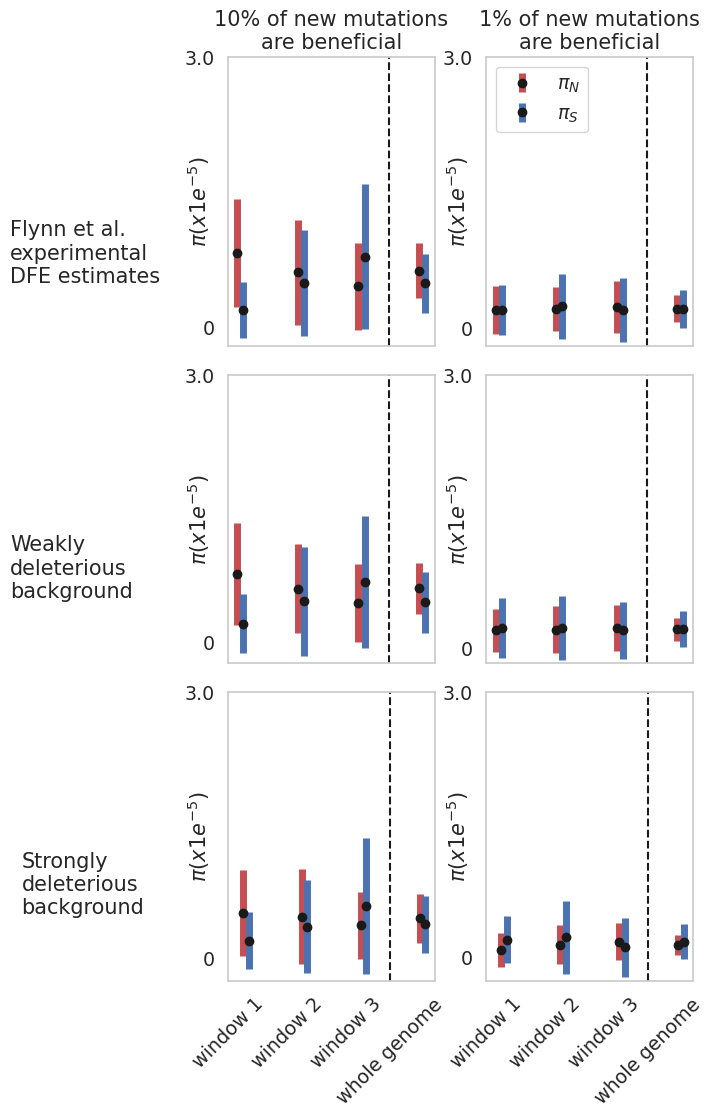

In [8]:
######LOAD IN SUMMARY STAT DATA#####
NS_wins = []
S_wins = []
NS = []
S = []

DFEs = ['', 'DFE1_', 'DFE3_']
inPaths = [r'/home/vivak/gu_response/summary_stats/flynn_etal_DFE/',
          r'/home/vivak/gu_response/summary_stats/flynn_DFE_1%beneficials/']


for DFE in DFEs:
    for inFile in inPaths:
        DFE1_NS = pd.read_csv(inFile + 'windows/' + DFE + 'MAF_NS.txt', sep='\t',
                   names=[1,2,3,4,5,6])
        for i in [1,3,5]:
            DFE1_NS[i] = DFE1_NS[i] / (6666-DFE1_NS[i+1])
        DFE1_NS = DFE1_NS[[1,3,5]]
        DFE1_NS.columns = [1,2,3]

        NS_wins.append(DFE1_NS)
        
        DFE1_S = pd.read_csv(inFile + 'windows/' + DFE + 'MAF_S.txt', sep='\t',
                   names=[1,2,3,4,5,6])
        for i in [1,3,5]:
            DFE1_S[i] = DFE1_S[i] / (3333-DFE1_S[i+1])
        DFE1_S = DFE1_S[[1,3,5]]
        DFE1_S.columns = [1,2,3]

        S_wins.append(DFE1_S)
        
        dfN = pd.read_csv(inFile + DFE + 'MAF_NS.txt', sep='\t',
                   names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                          'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                          'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
        dfN['thetapi'] = dfN['thetapi'] / (20000 - dfN['masked_sites'])

        NS.append(dfN)
        
        dfS = pd.read_csv(inFile + DFE + 'MAF_S.txt', sep='\t',
                   names=['fulid', 'fulidstar', 'fulif', 'fulifstar', 'hapdiv', 'hprime', 'nhaps', 
                          'numexternalmutations', 'numpoly', 'numsingletons', 'rm', 'tajimasd', 'thetah', 'thetal',
                          'thetapi', 'thetaw', 'wallsb', 'wallsbprime', 'wallsq','masked_sites'])
        dfS['thetapi'] = dfS['thetapi'] / (10000 - dfS['masked_sites']) 

        S.append(dfS)
        
sns.set(rc={'figure.figsize':(6,12),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
plts = [2,3,5,6,8,9]
for i, DFE in enumerate(NS):
    ax1 = plt.subplot(3,2,i+1)
    for win in [1,2,3]:
        ax1.errorbar([(win-1)+0], NS_wins[i][win].mean(), NS_wins[i][win].std(), fmt='ok', lw=5, ecolor=['r'])
        ax1.errorbar([(win-1)+0.1], S_wins[i][win].mean(), S_wins[i][win].std(), fmt='ok', lw=5, ecolor=['b'])
    #     if(i==1):
    #         plt.text(s='Weakly\ndeleterious\nbackground', x=-3.5, y=6e-5)
    #         plt.text(s='Complete selective sweep', x=2.25, y=1.75e-4)
            
    ax1.errorbar([3], NS[i]['thetapi'].mean(), NS[i]['thetapi'].std(), fmt='ok', lw=5, ecolor=['r'], label=r'$\pi_N$')
    ax1.errorbar([3.1], S[i]['thetapi'].mean(), S[i]['thetapi'].std(), fmt='ok', lw=5, ecolor=['b'], label=r'$\pi_S$')
    if(i<4):
        plt.xticks([])
    else:
        plt.xticks([-0.25,0.75,1.75,2.5], ['window 1', 'window 2', 'window 3', 'whole genome'], rotation = 45)
    
    plt.yticks([lim1[0], lim1[1]], ['0', str(np.round(lim1[1]*1e+4, 1))])
    ax1.set_ylabel(r'$\pi    (x    1e^{-5})$', labelpad=-20)
    if(i==0):
        ax1.set_title('10% of new mutations\nare beneficial')
        ax1.text(s='Flynn et al.\nexperimental\nDFE estimates', x=-3.75, y=5e-5)
    elif(i==1):
        ax1.set_title('1% of new mutations\nare beneficial')
        ax1.legend()
    elif(i==2):
        ax1.text(s='Weakly\ndeleterious\nbackground', x=-3.75, y=5e-5)
    elif(i==4):
        ax1.text(s='Strongly\ndeleterious\nbackground', x=-3.75, y=5e-5)
    plt.axvline(x=2.5, color='k', linestyle='--')



plt.subplots_adjust(wspace=0.25, hspace=0.1)

#plt.savefig('/home/vivak/gu_response/fig3.tiff', format='tiff', dpi=300, bbox_inches='tight')